# 02807 - Computational Tools for Data Science - Week 2

# Today
    
 * Introduction to the course and data science
 * Numerical computation and data manipulation with **NumPy**
 * The benefits of vectorisation
 * Jupyter notebooks for read-eval-print loop (REPL) - as these slides
 
 
* Last week: Python and tooling
    * One of the first things you'll do if hired as a data scientist is to setup your computer so you can do your job. This includes installing and configuring the software you'll be working with.
* Coming weeks: Lectures followed by either exercises or project work
    * Overview via [course website](https://courses.compute.dtu.dk/02807/2021/)

# Focus of the course
    
* In this course, you will learn about:
    * **state-of-the-art computational tools and techniques for working with data at scale**

* **Course topics**:
    * Practical prerequisites for data scientists
    * Interactively developing and presenting data science projects with Jupyter/Colab notebooks
    * Fundamental data science tools in Python: NumPy, Pandas, Matplotlib, etc.
    * Streaming, parallel computation via Spark for Python
    * Structured Query Languages (SQL) and relational databases



* The focus is on **practical hands-on experience**.
  * The *bulk of learning* come from solving the weekly exercises and course projects
    
* Aimed at a **diverse, cross-disciplinary audience**: 
    * Your classmates come from: Diploma, BSc and MSc in AI, computer science, business analytics, engineering, bioinformatics, mathematical modelling, software technology, and more!

# About the teacher

* Martin Holm Jensen // mhje@dtu.dk.
* External lecturer at DTU Compute.
* Cand.polyt in 2010 (Information technology), PhD in 2014 "Epistemic and Doxastic Planning"
* Five+ years experience in industry, including Head of AI and Data Science
  * AI for dermatology
* Also teaching 01017 Discrete Mathematics.

# What is data science?

* The study of data, which come in many shapes and forms

* It involves **storing, manipulating and analyzing data to extract useful information**. 

* **Goal** is to gain insights and knowledge from data

## A fundamentally inter-disciplinary subject

>Data science comprises three distinct and overlapping areas: 
>
> the **skills of a statistician** who knows how to **model and summarize datasets** (which are growing ever larger); 
>
><span style="color:red"> the **skills of a computer scientist** who can **design and use algorithms to efficiently store, process, and visualize this data** </span>; 
>
> and the **domain expertise**—what we might think of as "classical" training in a subject—necessary both to formulate the right questions and to put their answers in context.

Source: Python Data Science Handbook

## Titles and skill sets

This course mainly covers data engineering, but also touches on modeling and business analysis.

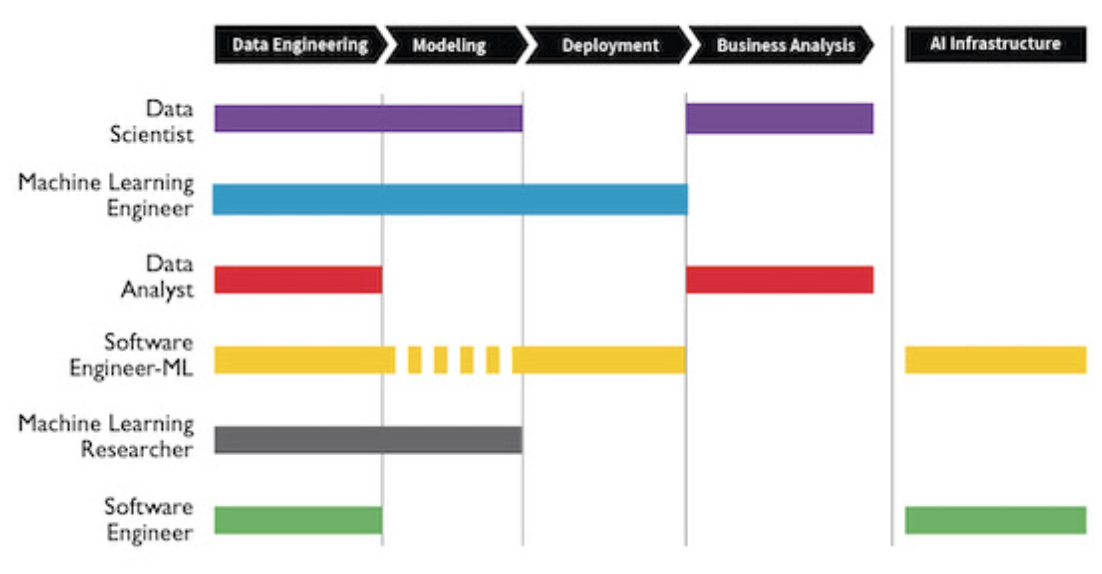

# The data science life cycle

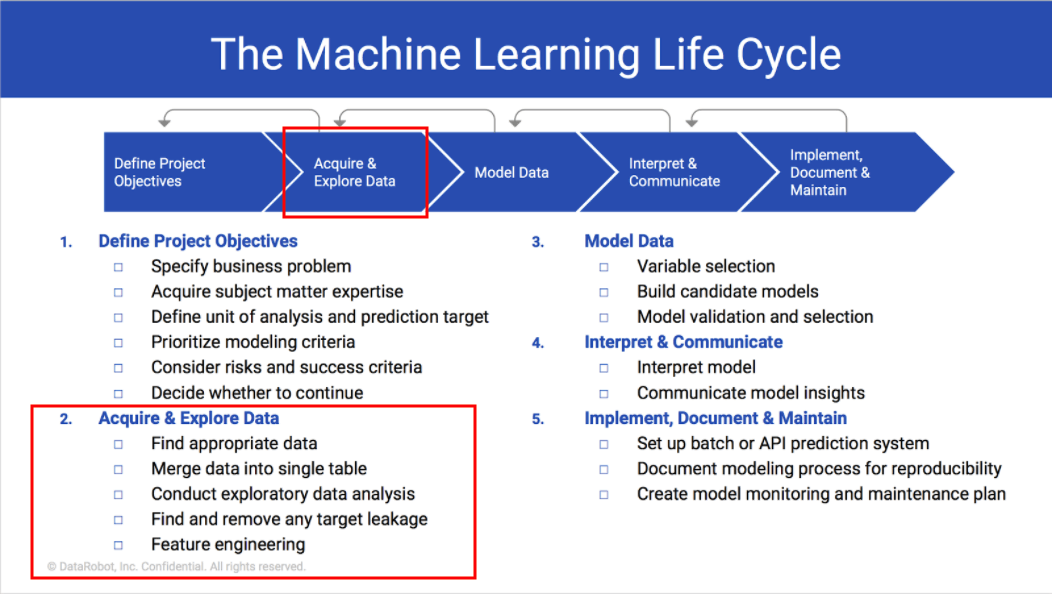

# Numerical computation with NumPy


* *Contains excerpts from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; readable edition [here](https://jakevdp.github.io/PythonDataScienceHandbook/) and more is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*
* An essential library for fast numerical computations in python
* Effective data-driven science and intensive computation, we need to understand how data is stored and manipulated.

## Understanding Data Types in Python

* Users of Python are often drawn-in by its **ease of use**.

* One reason for ease of use: *dynamic typing*

* *Data type*: attribute of variable which tells the compiler or interpreter how the programmer intends to use the data.

* Examples of data types: integers (`34`), floating points (`1.4`), Booleans (`True`), characters (`h`), strings (`hello`)...


# Static vs. dynamic typing

* A *statically-typed* language like C or Java requires each variable to be explicitly declared.
* Example. In C: 

```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

* A *dynamically-typed language* like Python skips this specification (types are **dynamically inferred**). This means that you **can program a little quicker** because you do not have to specify types every time.

* Equivalent operation in Python:

```python
# Python code
result = 0
for i in range(100):
    result += i
```


* In Python, we can assign any kind of data to any variable:

```python
# Python code
x = 4
x = "four"
```

* Here we've switched the contents of ``x`` from an integer to a string. 

* The same thing in C would lead (depending on compiler settings) to a compilation error or other unintented consequences:

```C
/* C code */
int x = 4;
x = "four";  // FAILS
```

* This sort of **flexibility** is one piece that makes Python and other dynamically-typed languages convenient and easy to use.

* Understanding *how* this works is an important piece of learning to analyze data efficiently and effectively with Python.

# A Python Integer Is More Than Just an Integer

* The standard Python implementation is written in C.

* Every Python object is simply a cleverly-disguised C structure, which contains not only its value, but other information as well. 

* An integer in Python, such as ``x = 10000``, ``x`` is not just a "raw" integer. 



* A single integer in Python 3.4 actually contains four pieces:

    * ``ob_refcnt``, a reference count to handle memory allocation and deallocation
    * ``ob_type``, **encodes the type of the variable**
    * ``ob_size``, specifies the size of the following data members
    * ``ob_digit``, **contains the actual integer value** being represented.


```C
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

# A trade-off between convenience and efficiency

* We incur some **overhead** in storing an integer in Python as compared to an integer in C.

* Extra information in the Python integer structure allows Python to be coded so freely and dynamically.

* This comes at a **cost**: as we run the program, we have to spend time figuring out
    * what type of data we are dealing with: "is it a `char` or an `int`?"
    * looking up whether we can do the operations we want to do on the data, given its type: "is addition defined for this data type? If so, what does it do?"
    * requires type-checking or duck typing, function dispatches, etc.
    
* Most any python behaviour can be overridden at runtime (monkey patching), so even function calls require the interpreter to dynamically lookup what the function does.
    * If calling `f(...)` followed by `g(...)` then `g` might have changed content of `f`, so calling `f` again requires a new lookup

# A Python List Is A Very Generic Container

* **List**: standard mutable multi-element container in Python.

* Stores a sequence of Python objects.

* We can create a list of integers as follows:

In [ ]:
L = list(range(10))
L # Prints the value of L.__repr__()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
type(L[0])

int

Or, similarly, a list of strings:

In [ ]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
type(L2[0])

str

Because of Python's dynamic typing, we can even create **heterogeneous lists**:

In [ ]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

## A function is not completely free
Moreover, because we can dynamically override functions, even function calls incur overhead

In [ ]:
def with_multiple_calls():
    def pass_fn():
        pass

    for i in range(100000):
        pass_fn()
        
def with_single_call():
    def passes_fn():
        for i in range(100000):
            pass

    passes_fn()

%timeit with_multiple_calls()
%timeit with_single_call()

3.95 ms ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
998 µs ± 4.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Both (contrived) functions performs 100,000 `pass` noops, but we see the computation overhead of making 100,000 calls of `pass_fn` rather than a single call of `passes_fn`. 

* In general though, don't sacrifice readability/legibility of your code for saving a few function calls 

# Fixed-Type Arrays in Python

* So python's flexibility comes at a cost
* To allow these flexible types of variables and functions: need to store and deal with type information for each object (`ob_type`, etc.)
* In the special case that **all data is of the same type**, much of this information is **redundant**
* **More efficient**: store data in a **fixed-type array**.


* The built-in ``array`` module (available since Python 3.3) can be used to create dense arrays of a uniform type:


In [ ]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

*``'i'`` is a type code indicating the contents are integers.

* Python's ``array`` object provides efficient storage of array-based data

* NumPy ``ndarray``(n-dimensional array) adds to this efficient **operations** on that data.

* **Much more efficient for storing and manipulating homogeneous data** than Python lists.

# NumPy container: `ndarray`

In [ ]:
import numpy as np

## Creating Arrays from Python Lists

* First, we can use ``np.array`` to create arrays from Python lists:

In [ ]:
# integer array:
np.array(L), type(np.array(L))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), numpy.ndarray)

* If we want to explicitly set the data type of the resulting array, we can use the ``dtype`` keyword:

In [ ]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

* Unlike Python lists, NumPy arrays can explicitly be **multi-dimensional**

In [ ]:
# nested lists result in multi-dimensional arrays
x = np.array([range(i, i + 3) for i in [2, 4, 6]])
print(x)
print("type of data:", x.dtype)
print("dimensions:", x.ndim)
print("size:", x.size)
print("shape:", x.shape)

[[2 3 4]
 [4 5 6]
 [6 7 8]]
type of data: int64
dimensions: 2
size: 9
shape: (3, 3)


## Creating Arrays from Scratch

* Especially for larger arrays, it is more efficient to create arrays from scratch using routines built into NumPy.


In [ ]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[-0.87026069,  0.91052841,  1.36337822],
       [ 0.03155953, -0.46966792,  1.0923219 ],
       [-0.55155027,  0.78930459, -0.73209118]])

## NumPy Standard Data Types


| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

# NumPy array manipulation and computation

Several useful operatation implemented efficiently:
    
* accessing and slicing data in the array
* concatenating, splitting arrays
* reshaping the array
* copying the array
* aggregating data to generate summary statistics
* extracting values satisfying a condition (masking)
* fancy indexing, sorting, etc.

See also the accompanying notebooks of the Python Data Science Handbook for examples and details. [A Visual Intro to NumPy and Data Representation](http://jalammar.github.io/visual-numpy/) is a great resource for visualising these operations.

## Access and slicing

In [ ]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x[5]

5

Array slicing works as on python lists, with the reading `x[start:stop:step]` and default values `start=0`, `stop=size of dimension`, `step=1`

In [ ]:
x[:5], x[5:5], x[5:6], x[7:], x[7:-1]

(array([0, 1, 2, 3, 4]),
 array([], dtype=int64),
 array([5]),
 array([7, 8, 9]),
 array([7, 8]))

In [ ]:
x[1::2]  # every other element starting from the second

array([1, 3, 5, 7, 9])

## Comparison operators, boolean masks, fancy indexing

In [ ]:
y = np.array([1, 2, 3, 4, 5])

In [ ]:
y >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [ ]:
2 * y, y ** 2

(array([ 2,  4,  6,  8, 10]), array([ 1,  4,  9, 16, 25]))

In [ ]:
(2 * y) == (y ** 2) # First element-wise operations * and **, then element-wise comparison
# Result is boolean mask

array([False,  True, False, False, False])

In [ ]:
# Array filled with values satisfying the mask; i.e. the second element
y[(2 * y) == (y ** 2)]

array([2])

In [ ]:
# Compare last two elements, with the first two elements multiplied by 3
y[-2:], y[:2] * 3,  y[-2:] > y[:2] * 3

(array([4, 5]), array([3, 6]), array([ True, False]))

In [ ]:
indices = [0, 2, 4]
y[indices] # Fancy indexing results in array of size |indices|

array([1, 3, 5])

The `numpy.where` function implements the ternary expression `x if condition else y`. 

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [ ]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [ ]:
result = np.where(cond, xarr, -1)
result

array([ 1.1, -1. ,  1.3,  1.4, -1. ])

## Broadcasting is what allows operations between different sized arrays to be performed, and is different from concatenation

In [ ]:
a = np.array([0, 1, 2])
a, a + 5

(array([0, 1, 2]), array([5, 6, 7]))

We can think of this as an operation that stretches or duplicates the value 5 into the array `[5, 5, 5]`, and adds the results. 

The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

In [ ]:
M = np.ones((3, 3))
a = np.array([0, 1, 2])
M, M + 5, M + a, M + a + 5

(array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 array([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]]),
 array([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]),
 array([[6., 7., 8.],
        [6., 7., 8.],
        [6., 7., 8.]]))

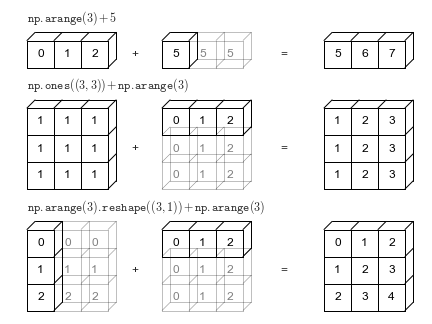

In [ ]:
# Concatenation means joining values of two arrays, not to be confused with +
[0, 1, 2] + [5, 6], np.concatenate([a, np.array([5, 6])])

([0, 1, 2, 5, 6], array([0, 1, 2, 5, 6]))

# Key to fast NumPy code: `ufuncs` and vectorisation


* **Computation on NumPy arrays can be very fast, or it can be very slow**

* The key to making it fast is to use **vectorized operations**, implemented through NumPy's **universal functions** (`ufuncs`).

In [ ]:
big_array = np.random.rand(1000000)
def my_sum(a):
    res = 0
    for v in a:
        res += v
    return res

%timeit sum(big_array)
%timeit my_sum(big_array)
%timeit np.sum(big_array)

39.3 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
47.2 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
201 µs ± 5.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Here `sum` (python builtin) must painstakingly check the data type of every one of the items in `big_array`, whereas `np.sum` uses the known data type of the array.

In [ ]:
big_array.dtype

dtype('float64')

## The Slowness of Loops

* Python loops can be *sluggish*: type-checking, function dispatches (recall the convenience vs efficiency trade-off)

* All the type-checking and related *overhead* adds up when many small operations are being repeated.

* Creates a *scalability problem*

## Example: Computing reciprocals

* Example: imagine we an array of values and we'd like to compute the reciprocal of each. 

* A straightforward approach:

In [ ]:
# reciprocal: n => 1/n

import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
print("values:", values)
print("reciprocals:", compute_reciprocals(values))

values: [6 1 4 4 8]
reciprocals: [0.16666667 1.         0.25       0.25       0.125     ]


Let's look at the **time performance**.

In [ ]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

845 ms ± 4.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


* Bottleneck here is not the operations themselves, but the type-checking and function dispatches.

* Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type. **Lots of overhead**.

* Can be done much more efficiently with **vectorised operations**.

# What is vectorisation?

> This practice of replacing explicit loops with array expressions is commonly referred to as **vectorization**. In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact seen in any kind of numerical computations. (Source: [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html), Wes McKinney)

* Many calculations require to repeatedly do the same operations with all items in one or several arrays. 
* **Vectorised operations** express these repeated operations on data avoiding Python `for` loops.
* Operations are instead "pushed down" to the C level, which is much faster. 
* The operations are still taking place, of course, just “behind the scenes” in optimized, pre-compiled C code.

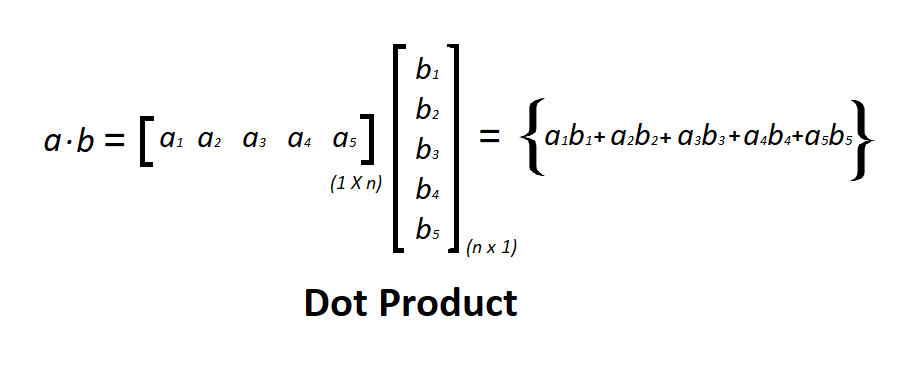

## Example: using the `ufunc` `/` instead of `compute_reciprocals`
    
* The operation `/` is NumPy's universal function for division.
* can be applied directly to arrays to compute reciprocals without any loops. That is, it's a vectorised operation.    

In [ ]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


* How much faster did we get? 

* Looking at the execution time for our big array `big_array`, we see that it completes *orders of magnitude faster* than the Python loop:

In [ ]:
%timeit compute_reciprocals(big_array)

827 ms ± 7.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit (1.0 / big_array)

658 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Why vectorisation is so much faster

Roughly speaking, the key technical factors are:

1. **No dynamic typing overhead** from Python `for` loops: 
    * we save time by avoiding dynamic type-checking, dynamic dispatches, etc.


2. **Parallelisation**

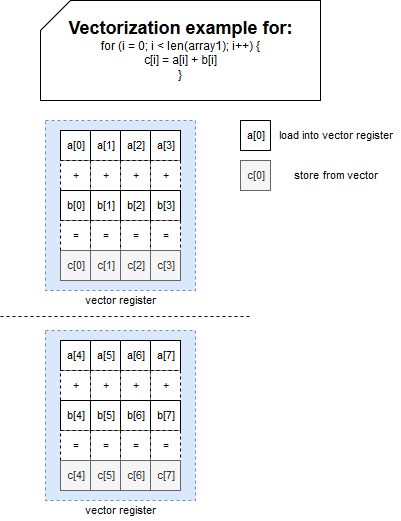

2. **Parallelisation** (continued): 
* When we're applying the same operation independently to each element of an array, e.g. when computing reciprocals, we can perform them independently of each, that is, out of order.
* Modern computers allow operations on several items at once via a form of vector registers. 
    * This is known as hardware pipelining, where a single core performs multiple operations in parallel. This scales computation by a constant factor, subject to the computer architecture and data type (number of bits) in question.
* A multi-core computer then additionally operates on its own sub-part simultaneously. As the computations are done in parallel, with $n$ cores, we (best-case) scale computation by a factor of $n$. Not all numpy functions support multiple cores.

3. **Locality**:
* The objects in a Python list may be stored in parts of memory that are far apart from each other, and just fetching the data from such locations takes time.
* NumPy makes sure to put all relevant data into the same area of memory (when possible). As the CPU requests data to be loaded into registers, having this data locality means the CPU is waiting less for the values stored in general purpose memory (RAM). 

## Practical take-aways

* Python by default not suited for numerical computation, but the python ecosystem contain libraries that enable efficient numerical computation

* Avoid Python loops when possible as this increases compute cost

* Always try to take advantage of NumPy's universal functions as this enables vectorisation. 
    * Operations covered in these slides are in fact vectorized -- and more concise than their python equivalents (e.g. `np.where`).

* It's not always easy to see how a data manipulation task could be formulated using vectorisation. This is an important skill to acquire, since it can yield huge speed-ups and make data manipulations feasible.

NumPy is a key building block in Python's scientific computing ecosystem
* We will also be digging into pandas, matplotlib, and scikit-learn
    
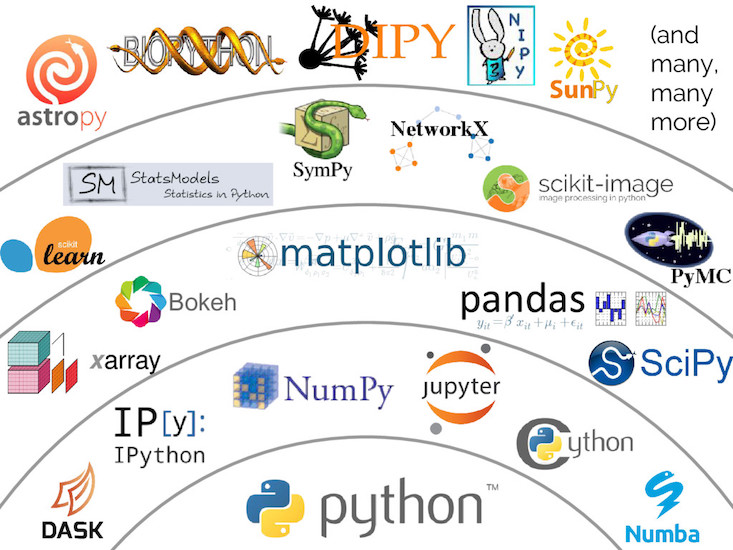
